In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data = genfromtxt('./data/Delivery.csv', delimiter=",")
print(data)

[[100.    4.    9.3]
 [ 50.    3.    4.8]
 [100.    4.    8.9]
 [100.    2.    6.5]
 [ 50.    2.    4.2]
 [ 80.    2.    6.2]
 [ 75.    3.    7.4]
 [ 65.    4.    6. ]
 [ 90.    3.    7.6]
 [ 90.    2.    6.1]]


In [4]:
x_data = data[:,:-1]
y_data = data[:,-1]
print(x_data)
print(y_data)

[[100.   4.]
 [ 50.   3.]
 [100.   4.]
 [100.   2.]
 [ 50.   2.]
 [ 80.   2.]
 [ 75.   3.]
 [ 65.   4.]
 [ 90.   3.]
 [ 90.   2.]]
[9.3 4.8 8.9 6.5 4.2 6.2 7.4 6.  7.6 6.1]


In [5]:
lr = 0.0001
theta0 = 0
theta1 = 0
theta2 = 0
epochs = 1000

def compute_error(theta0,theta1,theta2,x_data,y_data):
    totalError = 0
    for i in range(len(x_data)):
        totalError += (y_data[i]-(theta1*x_data[i,0]+theta2*x_data[i,1]+theta0))**2
    return totalError/float(len(x_data))

def gradient_descent_runner(x_data,y_data,theta0,theta1,theta2,lr,epochs):
    m = float(len(x_data))
    for i in range(epochs):
        theta0_grad = 0
        theta1_grad = 0
        theta2_grad = 0
        for j in range(0,len(x_data)):
            theta0_grad+=(1/m)*((theta1*x_data[j,0]+theta2*x_data[j,1]))
            theta1_grad+=(1/m)*x_data[j,0]*((theta1*x_data[j,0]+theta2*x_data[j,1]+theta0)-y_data[j])
            theta2_grad+=(1/m)*x_data[j,1]*((theta1*x_data[j,0]+theta2*x_data[j,1]+theta0)-y_data[j])
            theta0 = theta0-(lr*theta0_grad)
            theta1 = theta1-(lr*theta1_grad)
            theta2 = theta2-(lr*theta2_grad)
    return theta0,theta1,theta2
    

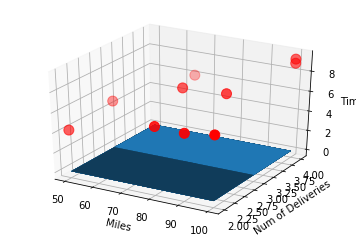

In [7]:
ax = plt.figure().add_subplot(111,projection='3d')
ax.scatter(x_data[:,0],x_data[:,1],y_data,c='r',marker='o',s=100)
x0=x_data[:,0]
x1=x_data[:,1]
x0,x1 = np.meshgrid(x0,x1)
z = theta0+x0*theta1+x1*theta2

ax.plot_surface(x0,x1,z)
ax.set_xlabel('Miles')
ax.set_ylabel('Num of Deliveries')
ax.set_zlabel('Time')
plt.show()